In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score,
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
)

import shap
from sklearn.inspection import permutation_importance

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100

/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA

In [2]:
df = pd.read_csv("heloc_dataset_v1.xls", sep=",")
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [3]:
df.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [4]:
df.shape

(10459, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,10459.0,67.425758,21.121621,-9.0,63.0,71.0,79.0,94.0
MSinceOldestTradeOpen,10459.0,184.205373,109.683816,-9.0,118.0,178.0,249.5,803.0
MSinceMostRecentTradeOpen,10459.0,8.543455,13.301745,-9.0,3.0,5.0,11.0,383.0
AverageMInFile,10459.0,73.843293,38.782803,-9.0,52.0,74.0,95.0,383.0
NumSatisfactoryTrades,10459.0,19.428052,13.004327,-9.0,12.0,19.0,27.0,79.0
NumTrades60Ever2DerogPubRec,10459.0,0.042738,2.513910,-9.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,10459.0,-0.142843,2.367397,-9.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,10459.0,86.661536,25.999584,-9.0,87.0,96.0,100.0,100.0
MSinceMostRecentDelq,10459.0,6.762406,20.501250,-9.0,-7.0,-7.0,14.0,83.0
MaxDelq2PublicRecLast12M,10459.0,4.928291,3.756275,-9.0,4.0,6.0,7.0,9.0


In [7]:
print(df["RiskPerformance"].value_counts(normalize=True).mul(100).round(1))

RiskPerformance
Bad     52.2
Good    47.8
Name: proportion, dtype: float64


In [8]:
# special values represent missing data -> domain knowledge
special_values = {
    -9: "No Bureau Record",
    -8: "No Usable/Valid Trades or Inquiries",
    -7: "Condition not Met",
}

print("Missing Data Patterns:")
# skip the traget variable which is why we start from 1:
for col in df.columns[1:]:
    special_count = df[col].isin([-9, -8, -7]).sum()
    if special_count > 0:
        pct = 100 * special_count / len(df)
        print(f"  {col}: {special_count:,} ({pct:.1f}%)")

Missing Data Patterns:
  ExternalRiskEstimate: 598 (5.7%)
  MSinceOldestTradeOpen: 827 (7.9%)
  MSinceMostRecentTradeOpen: 588 (5.6%)
  AverageMInFile: 588 (5.6%)
  NumSatisfactoryTrades: 588 (5.6%)
  NumTrades60Ever2DerogPubRec: 588 (5.6%)
  NumTrades90Ever2DerogPubRec: 588 (5.6%)
  PercentTradesNeverDelq: 588 (5.6%)
  MSinceMostRecentDelq: 5,428 (51.9%)
  MaxDelq2PublicRecLast12M: 588 (5.6%)
  MaxDelqEver: 588 (5.6%)
  NumTotalTrades: 588 (5.6%)
  NumTradesOpeninLast12M: 588 (5.6%)
  PercentInstallTrades: 588 (5.6%)
  MSinceMostRecentInqexcl7days: 2,919 (27.9%)
  NumInqLast6M: 588 (5.6%)
  NumInqLast6Mexcl7days: 588 (5.6%)
  NetFractionRevolvingBurden: 774 (7.4%)
  NetFractionInstallBurden: 4,007 (38.3%)
  NumRevolvingTradesWBalance: 744 (7.1%)
  NumInstallTradesWBalance: 1,449 (13.9%)
  NumBank2NatlTradesWHighUtilization: 1,171 (11.2%)
  PercentTradesWBalance: 606 (5.8%)


In [9]:
# clean the data and replace special values with NaN
df_clean = df.copy()
for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].replace([-9, -8, -7], np.nan)

Statistical feature analysis to identify the most discriminative features

In [10]:
def analyze_feature_significance(df, feature, target="RiskPerformance"):
    """Compare feature means between Good and Bad risk groups."""
    good = df[df[target] == "Good"][feature].dropna()
    bad = df[df[target] == "Bad"][feature].dropna()

    # Skip constant features
    if good.std() == 0 or bad.std() == 0:
        return None

    # Welch's t-test
    t_stat, p_value = stats.ttest_ind(good, bad, equal_var=False)

    # Effect size (Cohen's d)
    cohens_d = (good.mean() - bad.mean()) / np.sqrt(
        (good.std() ** 2 + bad.std() ** 2) / 2
    )

    return {
        "Feature": feature,
        "Good_Mean": good.mean(),
        "Bad_Mean": bad.mean(),
        "Mean_Diff": good.mean() - bad.mean(),
        "P_Value": p_value,
        "Cohens_D": cohens_d,
    }

In [11]:
feature_stats = []
for col in df_clean.columns[1:]:
    if np.issubdtype(df_clean[col].dtype, np.number):
        res = analyze_feature_significance(df_clean, col)
        if res:
            feature_stats.append(res)

stats_df = (
    pd.DataFrame(feature_stats)
    .sort_values(by="Cohens_D", key=abs, ascending=False)
    .reset_index(drop=True)
)

print("\nTop 10 Features by Effect Size:")
print(stats_df.head(10).to_string(index=False))


Top 10 Features by Effect Size:
                           Feature  Good_Mean   Bad_Mean  Mean_Diff       P_Value  Cohens_D
              ExternalRiskEstimate  76.790830  67.694423   9.096408  0.000000e+00  1.037246
        NetFractionRevolvingBurden  24.266709  44.834971 -20.568262 7.411023e-290 -0.764003
             PercentTradesWBalance  60.043965  72.365092 -12.321126 9.805950e-176 -0.582054
            PercentTradesNeverDelq  95.515312  89.450935   6.064377 2.055588e-153  0.537597
NumBank2NatlTradesWHighUtilization   0.709290   1.464036  -0.754746 1.407117e-128 -0.508194
                    AverageMInFile  87.429989  70.801791  16.628198 2.437464e-133  0.503064
          MaxDelq2PublicRecLast12M   6.163464   5.384151   0.779312 3.262971e-128  0.490233
                       MaxDelqEver   6.791975   5.989681   0.802294 2.393907e-106  0.445566
             MSinceOldestTradeOpen 222.786595 180.431396  42.355199 8.323025e-102  0.442552
              MSinceMostRecentDelq  27.051641  

Correlation analysis to check for multicollinearity. We can drop redundant features and this helps imporve interpretability and generalization

In [12]:
corr_matrix = df_clean.drop("RiskPerformance", axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

selected_candidates = [f for f in stats_df["Feature"] if f not in to_drop]
top_4_features = selected_candidates[:4]

In [13]:
# key features
for i, f in enumerate(top_4_features, 1):
    row = stats_df[stats_df["Feature"] == f].iloc[0]
    print(f"{i}. {f}  |  Cohen’s d = {row['Cohens_D']:.2f},  p = {row['P_Value']:.1e}")

1. ExternalRiskEstimate  |  Cohen’s d = 1.04,  p = 0.0e+00
2. NetFractionRevolvingBurden  |  Cohen’s d = -0.76,  p = 7.4e-290
3. PercentTradesWBalance  |  Cohen’s d = -0.58,  p = 9.8e-176
4. PercentTradesNeverDelq  |  Cohen’s d = 0.54,  p = 2.1e-153


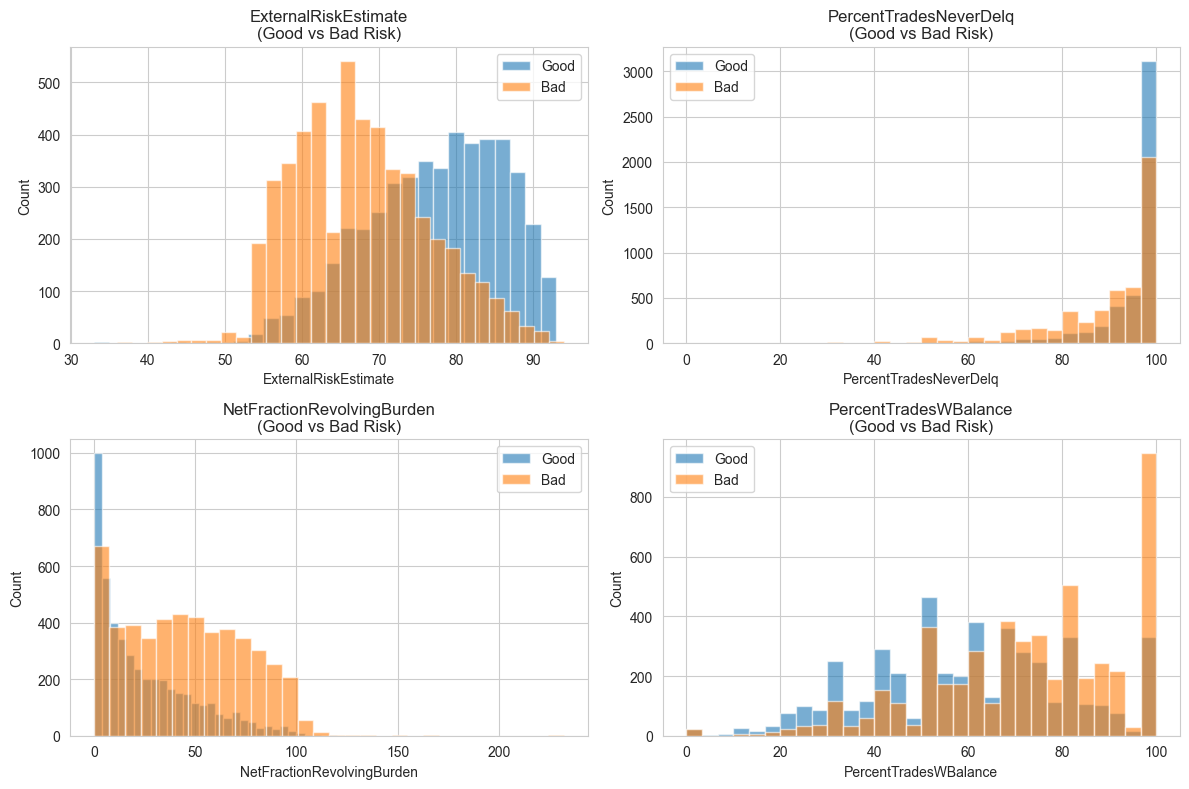

In [14]:
key_features = [
    "ExternalRiskEstimate",
    "PercentTradesNeverDelq",
    "NetFractionRevolvingBurden",
    "PercentTradesWBalance",
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feat in enumerate(key_features):
    for risk in ["Good", "Bad"]:
        data = df_clean[df_clean["RiskPerformance"] == risk][feat].dropna()
        axes[i].hist(data, alpha=0.6, label=risk, bins=30)
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Count")
    axes[i].legend()
    axes[i].set_title(f"{feat}\n(Good vs Bad Risk)")

plt.tight_layout()
plt.show()

## Build Model

In [15]:
# features and target
X = df.drop("RiskPerformance", axis=1)
y = (df["RiskPerformance"] == "Good").astype(int)  # 1 = Good, 0 = Bad

X = X.replace([-9, -8, -7], np.nan)
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

feature_names = X.columns.tolist()
print(f"Training set: {len(X_train):,} | Test set: {len(X_test):,}")

Training set: 8,367 | Test set: 2,092


In [16]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric="logloss",
)
xgb.fit(X_train, y_train)

# LightGBM
lgbm = LGBMClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbose=-1
)
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=5, random_state=42, verbose=-1)

### Compare models

In [17]:
def evaluate_model(model, X_te, y_te, name):
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_te, y_pred),
        "ROC-AUC": roc_auc_score(y_te, y_prob),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "F1": f1_score(y_te, y_pred),
        "AP": average_precision_score(y_te, y_prob),
    }
    return metrics


results = pd.DataFrame(
    [
        evaluate_model(xgb, X_test, y_test, "XGBoost"),
        evaluate_model(lgbm, X_test, y_test, "LightGBM"),
    ]
)

results.set_index("Model").style.format("{:.3f}").background_gradient(
    cmap="RdYlGn", axis=0
)

,Accuracy,ROC-AUC,Precision,Recall,F1,AP
Model,,,,,,
XGBoost,0.717,0.792,0.717,0.676,0.696,0.776
LightGBM,0.713,0.792,0.712,0.672,0.691,0.776


XGBoost shows strong performance across all evaluation metrics so I will use it for explanability analysis from here onwards..

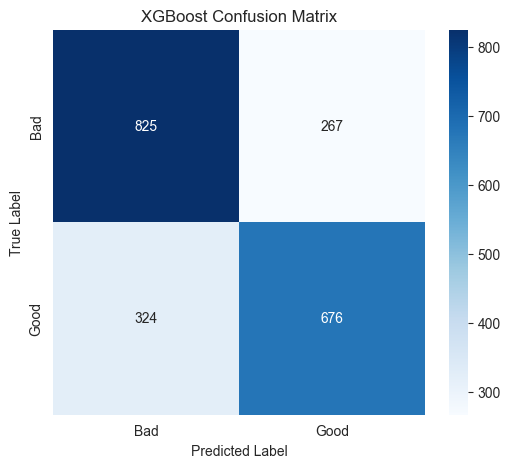


Classification Report:
              precision    recall  f1-score   support

         Bad       0.72      0.76      0.74      1092
        Good       0.72      0.68      0.70      1000

    accuracy                           0.72      2092
   macro avg       0.72      0.72      0.72      2092
weighted avg       0.72      0.72      0.72      2092



In [18]:
# confusion matrix
y_pred_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Bad", "Good"],
    yticklabels=["Bad", "Good"],
)
plt.title("XGBoost Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Bad", "Good"]))

## Global Explainability: What Matters Most?

We are seeing which features drive the models decision across all applications

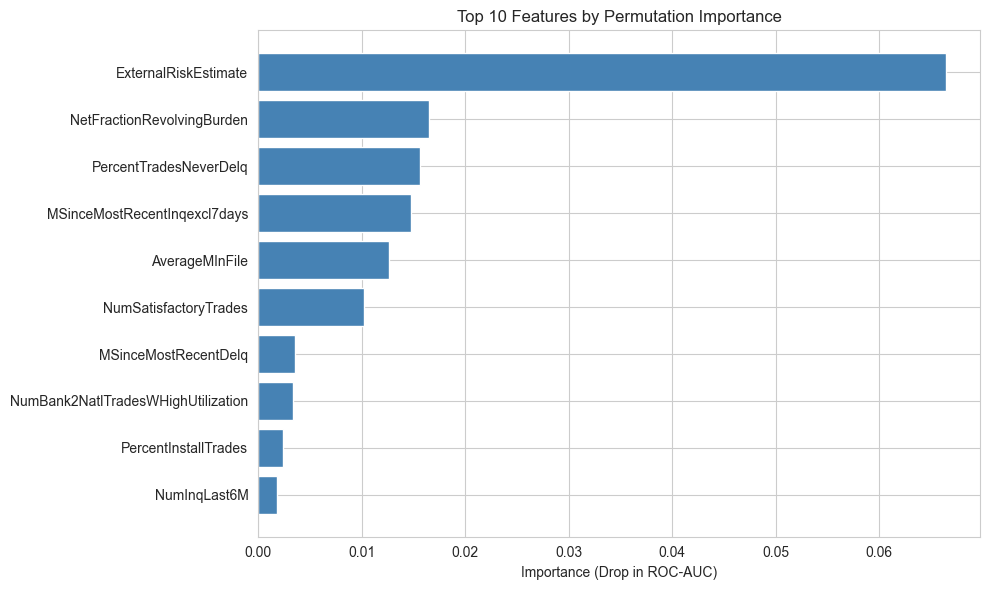


Most Important Features: ExternalRiskEstimate, NetFractionRevolvingBurden, PercentTradesNeverDelq


In [19]:
# permutation importance
perm_imp = permutation_importance(
    xgb, X_test, y_test, n_repeats=10, random_state=42, scoring="roc_auc"
)

# top 10 features
imp_df = (
    pd.DataFrame({"feature": feature_names, "importance": perm_imp.importances_mean})
    .sort_values("importance", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
plt.barh(imp_df["feature"], imp_df["importance"], color="steelblue")
plt.xlabel("Importance (Drop in ROC-AUC)")
plt.title("Top 10 Features by Permutation Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_features = imp_df["feature"].tolist()[:3]
print(f"\nMost Important Features: {', '.join(top_features)}")

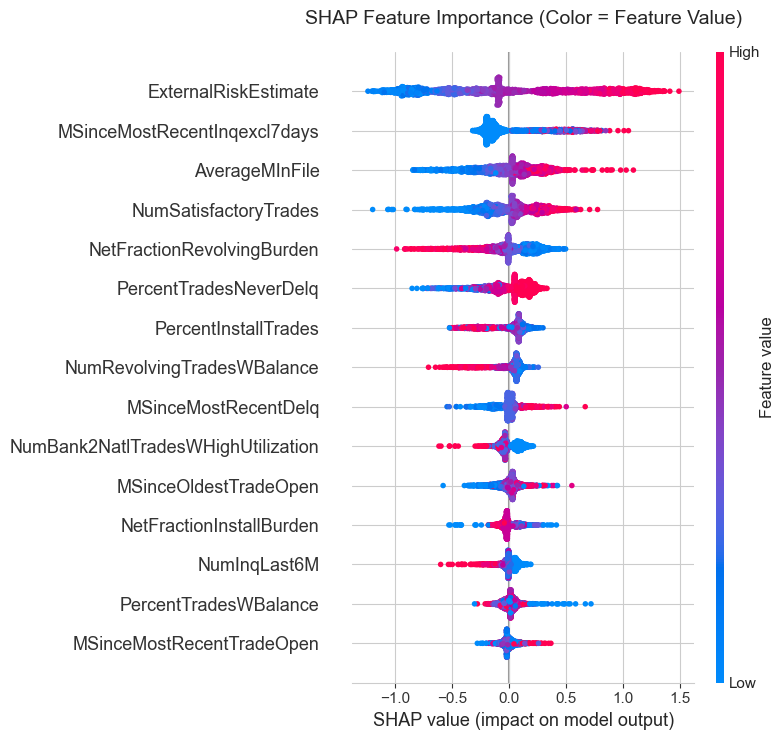

In [20]:
# SHAP values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, show=False, max_display=15)
plt.title("SHAP Feature Importance (Color = Feature Value)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Local Explainability: Why This Specific Decision?
This helps us understand the applicants question why was their application approved or denied

Applicant #4
Predicted: Bad (probability: 18.9%)
Actual: Bad


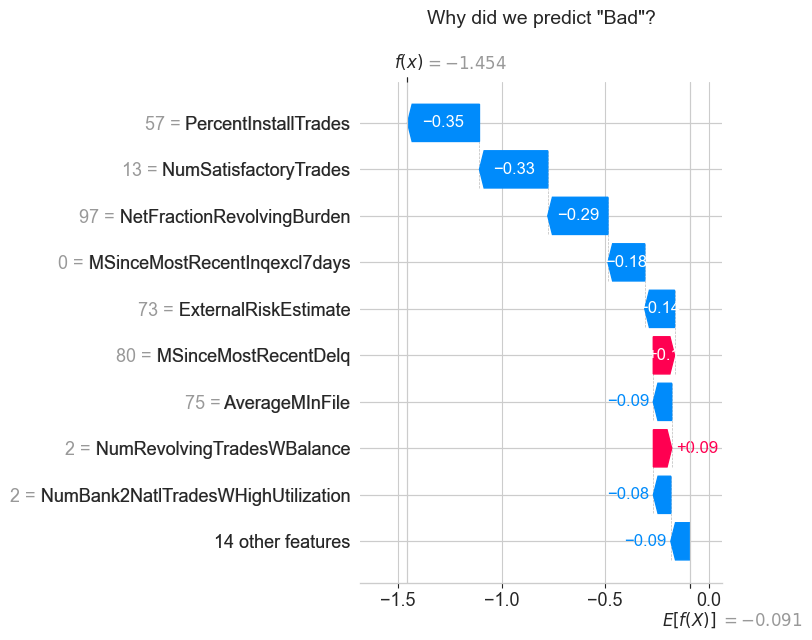

Applicant #0
Predicted: Bad (probability: 26.7%)
Actual: Good


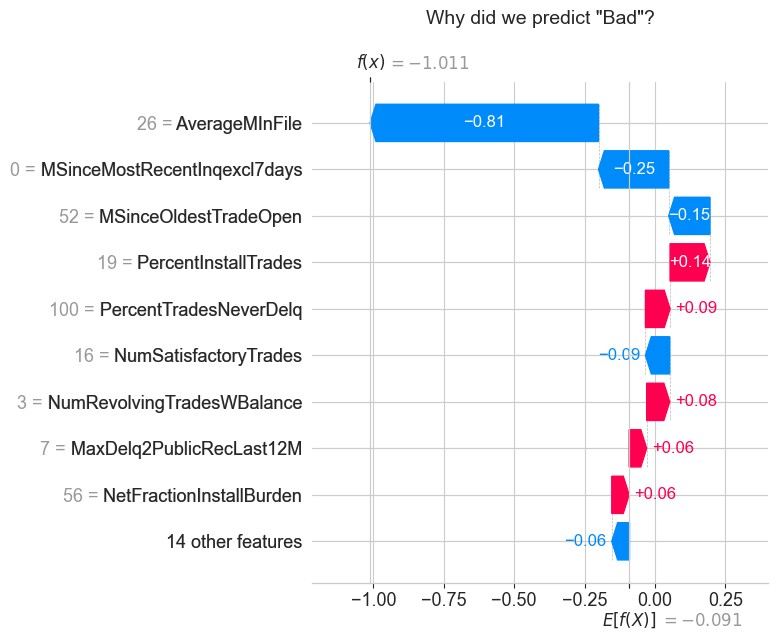

In [21]:
def explain_individual(idx, dataset=X_test, labels=y_test):

    # prediction
    instance = dataset.iloc[idx : idx + 1]
    prob = xgb.predict_proba(instance)[0, 1]
    pred = "Good" if prob >= 0.5 else "Bad"
    actual = "Good" if labels.iloc[idx] == 1 else "Bad"

    print(f"Applicant #{idx}")
    print(f"Predicted: {pred} (probability: {prob:.1%})")
    print(f"Actual: {actual}")

    shap.plots.waterfall(shap_values[idx], show=False)
    plt.title(f'Why did we predict "{pred}"?', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()


high_risk_idx = y_test[y_test == 0].index[0]
high_risk_pos = X_test.index.get_loc(high_risk_idx)
explain_individual(high_risk_pos)

low_risk_idx = y_test[y_test == 1].index[0]
low_risk_pos = X_test.index.get_loc(low_risk_idx)
explain_individual(low_risk_pos)

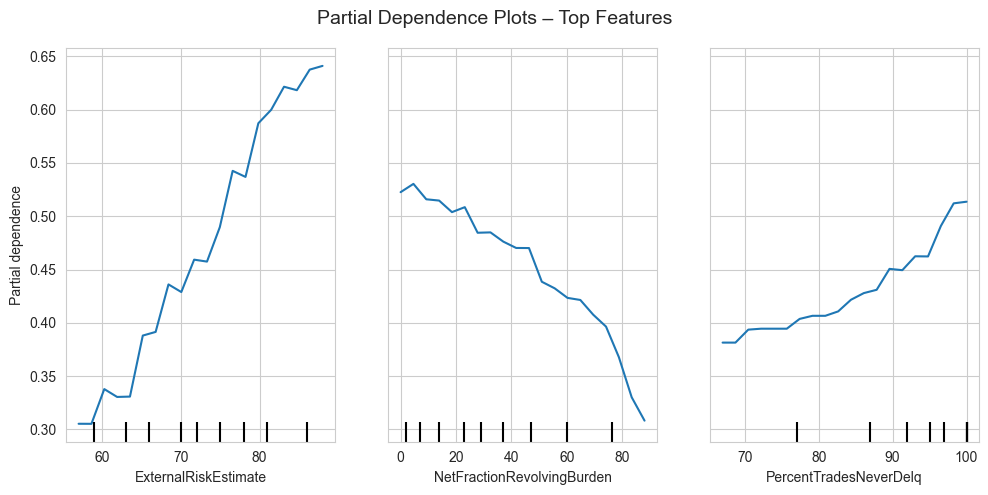

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    xgb, X_test, features=top_features, kind="average", grid_resolution=20, ax=ax
)
plt.suptitle("Partial Dependence Plots – Top Features", fontsize=14)
plt.tight_layout()
plt.show()

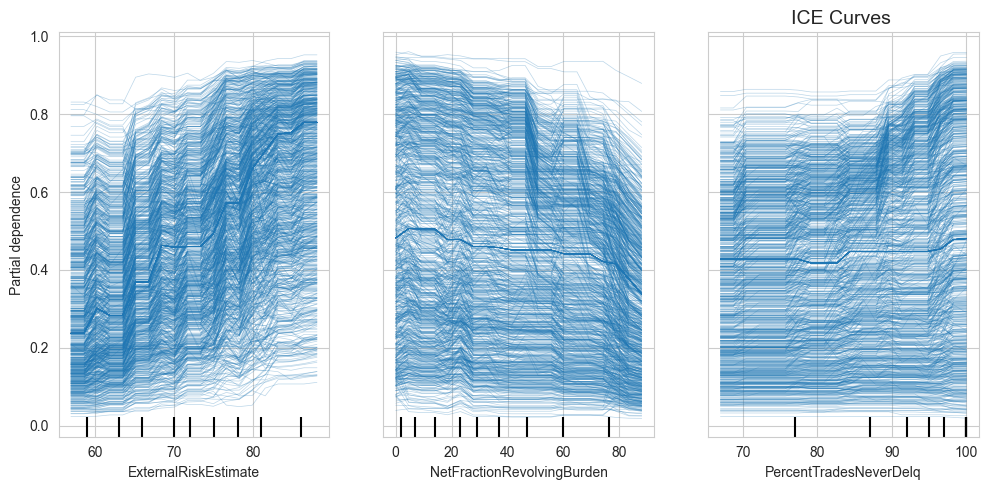

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    xgb, X_test, features=top_features, kind="individual", grid_resolution=20, ax=ax
)
plt.title(f"ICE Curves ", fontsize=14)
plt.tight_layout()
plt.show()

## Business Optimization: Finding the Right Threshold

We want to find the optimal balance as setting it to 0.5 is arbitary. High threshold -> fewer approvals and lower threshold -> more approvals

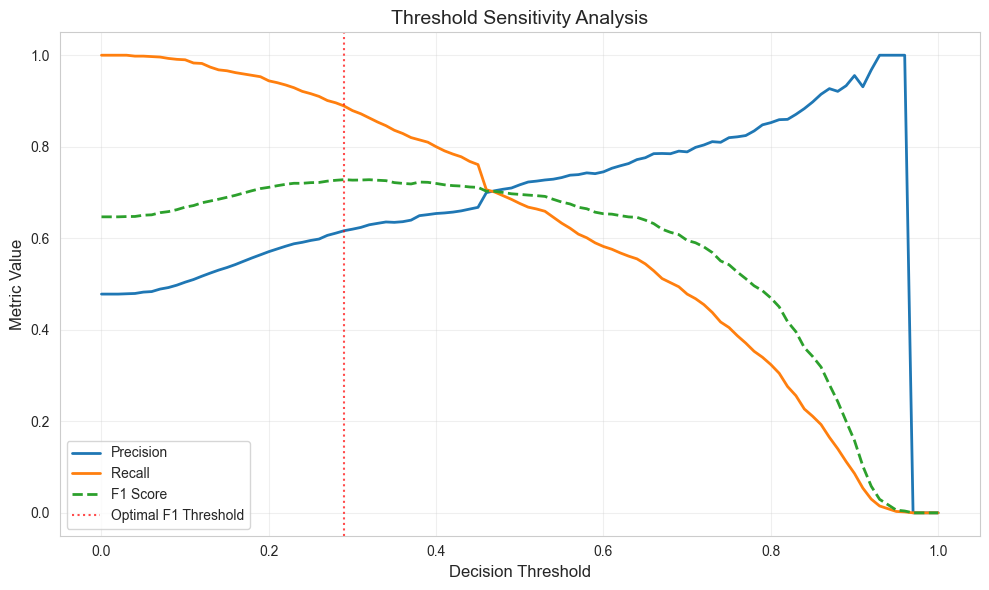


Optimal Threshold for F1: 0.29
  → Precision: 61.65%
  → Recall: 88.90%
  → F1 Score: 72.81%

Business Interpretation:
  At this threshold, 89% of good applicants are approved,
  and 62% of approvals are actually good.


In [28]:
def threshold_sweep(model, X_te, y_te, steps=101):
    p = model.predict_proba(X_te)[:, 1]
    thresholds = np.linspace(0, 1, steps)

    results = []
    for t in thresholds:
        y_pred = (p >= t).astype(int)
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_te, y_pred, average="binary", zero_division=0
        )
        results.append({"threshold": t, "precision": prec, "recall": rec, "f1": f1})

    return pd.DataFrame(results)


# threshold analysis
threshold_df = threshold_sweep(xgb, X_test, y_test)

plt.figure(figsize=(10, 6))
plt.plot(
    threshold_df["threshold"],
    threshold_df["precision"],
    label="Precision",
    linewidth=2,
)
plt.plot(
    threshold_df["threshold"],
    threshold_df["recall"],
    label="Recall ",
    linewidth=2,
)
plt.plot(
    threshold_df["threshold"],
    threshold_df["f1"],
    label="F1 Score ",
    linewidth=2,
    linestyle="--",
)

# optimal F1 threshold
best = threshold_df.loc[threshold_df["f1"].idxmax()]
plt.axvline(
    best["threshold"],
    color="red",
    linestyle=":",
    alpha=0.7,
    label=f"Optimal F1 Threshold",
)

plt.xlabel("Decision Threshold", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("Threshold Sensitivity Analysis", fontsize=14)
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal Threshold for F1: {best['threshold']:.2f}")
print(f"  → Precision: {best['precision']:.2%}")
print(f"  → Recall: {best['recall']:.2%}")
print(f"  → F1 Score: {best['f1']:.2%}")

print(f"\nBusiness Interpretation:")
print(f"  At this threshold, {best['recall']:.0%} of good applicants are approved,")
print(f"  and {best['precision']:.0%} of approvals are actually good.")

## What If Analysis

I will now look at scenario simulation. So we can answer questions like:
- If this applicant improved their credit score by 20 points, would they be approved?
- How much would reducing credit utilization help?

and so on

In [25]:
def what_if_scenario(model, base_instance, changes: dict):
    instance = base_instance.copy()

    for feature, new_value in changes.items():
        idx = feature_names.index(feature)
        instance[idx] = new_value

    prob = model.predict_proba(instance.reshape(1, -1))[0, 1]
    return prob


# borderline applicant
probs = xgb.predict_proba(X_test)[:, 1]
borderline_idx = np.argmin(np.abs(probs - 0.5))
applicant = X_test.iloc[borderline_idx].values
base_prob = probs[borderline_idx]

print(f"What-If Analysis: Borderline Applicant (Baseline Prob: {base_prob:.1%})")

# interventions on top 3 features
scenarios = []
for feature in top_features:
    feat_idx = feature_names.index(feature)
    current_val = applicant[feat_idx]

    # +1 standard deviation improvement
    improvement = np.std(X_test[feature])
    new_val = current_val + improvement
    new_prob = what_if_scenario(xgb, applicant, {feature: new_val})

    delta = new_prob - base_prob
    scenarios.append(
        {
            "Feature": feature,
            "Current": f"{current_val:.1f}",
            "Improved": f"{new_val:.1f}",
            "New Probability": f"{new_prob:.1%}",
            "Impact": f"{delta:+.1%}",
        }
    )

scenario_df = pd.DataFrame(scenarios)
print(scenario_df.to_string(index=False))

print("\nActionable Recommendation:")
best_scenario = scenarios[
    np.argmax([float(s["Impact"].strip("%+")) for s in scenarios])
]
print(f"Improving '{best_scenario['Feature']}' would have the largest impact.")
print(
    f"A {float(best_scenario['Improved']) - float(best_scenario['Current']):.0f}-point increase"
)
print(f"would boost approval probability by {best_scenario['Impact']}.")

What-If Analysis: Borderline Applicant (Baseline Prob: 50.0%)
                   Feature Current Improved New Probability Impact
      ExternalRiskEstimate    79.0     88.8           48.6%  -1.4%
NetFractionRevolvingBurden    13.0     40.8           52.2%  +2.2%
    PercentTradesNeverDelq    90.0    101.7           61.7% +11.7%

Actionable Recommendation:
Improving 'PercentTradesNeverDelq' would have the largest impact.
A 12-point increase
would boost approval probability by +11.7%.


## Counterfactual Paths

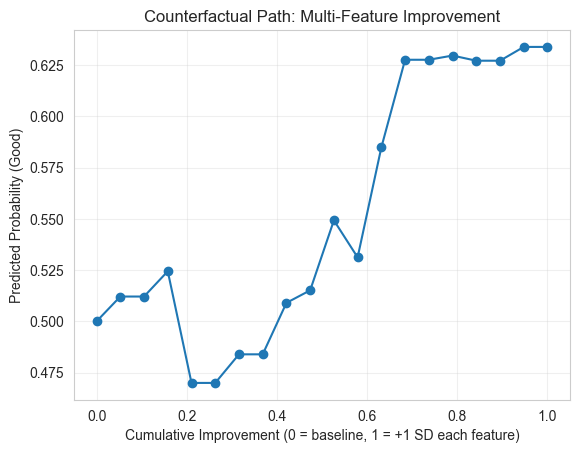

In [26]:
steps = np.linspace(0, 1, 20)
path_probs = []
for step in steps:
    mod_app = applicant.copy()
    for feat in top_features:
        idx = feature_names.index(feat)
        mod_app[idx] = applicant[idx] + step * np.std(X_test[feat])
    path_probs.append(xgb.predict_proba(mod_app.reshape(1, -1))[0, 1])

plt.plot(steps, path_probs, marker="o")
plt.xlabel("Cumulative Improvement (0 = baseline, 1 = +1 SD each feature)")
plt.ylabel("Predicted Probability (Good)")
plt.title("Counterfactual Path: Multi-Feature Improvement")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

X_test.to_csv("X_test.csv", index=False)

y_prob = xgb.predict_proba(X_test)[:, 1]
pred_df = pd.DataFrame({"y_test": y_test.values, "y_prob": y_prob})
pred_df.to_csv("predictions.csv", index=False)

   y_test    y_prob
0       1  0.266715
1       1  0.614564
2       1  0.631545
3       1  0.660070
4       0  0.189361
